In [ ]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [5]:
# Carga los archivos de datos en diferentes DataFrames
df_megaline_calls = pd.read_csv("C:/Users/JGCch/OneDrive/Desktop/Megaline_Telecom_Analysis/data/megaline_calls.csv")
df_megaline_internet = pd.read_csv("C:/Users/JGCch/OneDrive/Desktop/Megaline_Telecom_Analysis/data/megaline_internet.csv")
df_megaline_messages = pd.read_csv ("C:/Users/JGCch/OneDrive/Desktop/Megaline_Telecom_Analysis/data/megaline_messages.csv")
df_megaline_plans = pd.read_csv("C:/Users/JGCch/OneDrive/Desktop/Megaline_Telecom_Analysis/data/megaline_plans.csv")
df_megaline_users = pd.read_csv("C:/Users/JGCch/OneDrive/Desktop/Megaline_Telecom_Analysis/data/megaline_users.csv")

Los datos para este proyecto se dividen en varias tablas. Se explorara cada una para tener una comprensión inicial de los datos. Si es necesario, se haran las correcciones requeridas en cada tabla.

In [49]:
# Información general/resumida sobre el DataFrame de las tarifas
df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [7]:
#Muestra de los datos para las tarifas
df_megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
# Información general/resumida sobre el DataFrame de usuarios
df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Muestra de datos para usuarios
df_megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [10]:
#Correccion de tipo de datos
df_megaline_users['reg_date'] = pd.to_datetime(df_megaline_users['reg_date'])

df_megaline_users['reg_date'] = df_megaline_users['reg_date'].dt.strftime('%d-%m-%Y')

In [11]:
#Verificacion de cambio de tipo de dato
df_megaline_users.info()
df_megaline_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-2018,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-2018,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",21-10-2018,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",28-01-2018,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",23-05-2018,surf,NaN


In [13]:
# Información general/resumida sobre el DataFrame de las llamadas
df_megaline_calls.info()
df_megaline_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [14]:
#Correccion de datos 
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'])
df_megaline_calls['month'] = df_megaline_calls['call_date'].dt.month
df_megaline_calls = df_megaline_calls[df_megaline_calls['duration']>0]
df_megaline_calls['duration'] = np.ceil(df_megaline_calls['duration'])

In [15]:
df_megaline_calls.info()
df_megaline_calls.head()

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
 4   month      110901 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [16]:
# Información general/resumida sobre el DataFrame de los mensajes
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Muestra de datos para los mensajes
df_megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
#Correccion de datos
df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'])
df_megaline_messages['month'] = df_megaline_messages['message_date'].dt.month

In [19]:
#Validacion de datos
df_megaline_messages.info()
df_megaline_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [20]:
#Información general/resumida sobre el DataFrame de internet
df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
#Muestra de datos para el tráfico de internet
df_megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [22]:
#Correccion de datos
df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'])
df_megaline_internet['month'] = df_megaline_internet['session_date'].dt.month

In [23]:
#Validacion de datos
df_megaline_internet.info()
df_megaline_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [24]:
#Condiciones de las tarifas
df_megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [25]:
# Calculo del número de llamadas hechas por cada usuario al mes.
calls_by_user_monthly = df_megaline_calls.groupby(['user_id','month']).agg({'duration':['count']}).reset_index()
print("Cantidad de llamadas hechas por usuarios por mes: \n",calls_by_user_monthly.head())

Cantidad de llamadas hechas por usuarios por mes: 
   user_id month duration
                   count
0    1000    12       16
1    1001     8       22
2    1001     9       38
3    1001    10       47
4    1001    11       49


In [26]:
# Calculo de la cantidad de minutos usados por cada usuario al mes.
calls_by_user_monthly = df_megaline_calls.groupby(['user_id','month']).agg({'duration':['count', 'sum']}).reset_index()
print("Cantidad de llamadas hechas por usuarios por mes y suma de minutos: \n",calls_by_user_monthly.head())

Cantidad de llamadas hechas por usuarios por mes y suma de minutos: 
   user_id month duration       
                   count    sum
0    1000    12       16  124.0
1    1001     8       22  182.0
2    1001     9       38  315.0
3    1001    10       47  393.0
4    1001    11       49  426.0


In [27]:
# Calculo del número de mensajes enviados por cada usuario al mes. 
messages_by_user_monthly = df_megaline_messages.groupby(['user_id','month']).agg(total_messages = ('message_date','count')).reset_index()
print("Mensajes enviados por usuario mensualmente: \n",messages_by_user_monthly.head())

Mensajes enviados por usuario mensualmente: 
    user_id  month  total_messages
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36


In [28]:
# Calculo del volumen del tráfico de Internet usado por cada usuario al mes.
mb_used_by_user_monthly = df_megaline_internet.groupby(['user_id','month']).agg(total_mb_used = ('mb_used','sum')).reset_index()
print("MB usados por usuario mensualmente: \n",mb_used_by_user_monthly.head())

MB usados por usuario mensualmente: 
    user_id  month  total_mb_used
0     1000     12        1901.47
1     1001      8        6919.15
2     1001      9       13314.82
3     1001     10       22330.49
4     1001     11       18504.30


In [29]:
# Fusion de los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_by_user_monthly = df_megaline_calls.groupby(['user_id','month']).agg({'duration':['count','sum']}).reset_index()
calls_by_user_monthly.columns = ['user_id', 'month', 'num_calls', 'total_minutes']

messages_by_user_monthly = df_megaline_messages.groupby(['user_id','month']).agg({'message_date':['count']}).reset_index()
messages_by_user_monthly.columns = ['user_id', 'month', 'total_messages']

internet_by_user_monthly = df_megaline_internet.groupby(['user_id','month']).agg({'mb_used':['sum']}).reset_index()
internet_by_user_monthly.columns = ['user_id', 'month', 'mb_used']

In [30]:
# Se añade la información de la tarifa
user_monthly_data = calls_by_user_monthly.merge(
    messages_by_user_monthly, 
    on=['user_id', 'month'], 
    how='outer').merge(
    internet_by_user_monthly, 
    on=['user_id', 'month'], 
    how='outer'
)
user_monthly_data = user_monthly_data.merge(
    df_megaline_users[['user_id', 'plan']], 
    on='user_id', 
    how='left'
)
user_monthly_data = user_monthly_data.merge(
    df_megaline_plans, 
    left_on='plan', 
    right_on='plan_name', 
    how='left'
)

user_monthly_data.head()

,user_id,month,num_calls,total_minutes,total_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,22.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,38.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,47.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,49.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf


In [31]:
# Calculo del ingreso mensual para cada usuario
user_monthly_data['excess_minutes'] = np.maximum(0, 
    user_monthly_data['total_minutes'] - user_monthly_data['minutes_included'])
user_monthly_data['excess_sms'] = np.maximum(0, 
    user_monthly_data['total_messages'] - user_monthly_data['messages_included'])
user_monthly_data['excess_gb'] = np.maximum(0, 
    user_monthly_data['mb_used'] - user_monthly_data['mb_per_month_included'])
user_monthly_data['excess_gb'] = np.ceil(user_monthly_data['excess_gb'] / 1024)

user_monthly_data['excess_minutes_price']= (user_monthly_data['excess_minutes'] * user_monthly_data['usd_per_minute'])
user_monthly_data['excess_sms_price']=(user_monthly_data['excess_sms']*user_monthly_data['usd_per_message'])
user_monthly_data['excess_gb_price']=(user_monthly_data['excess_gb']*user_monthly_data['usd_per_gb'])

user_monthly_data['monthly_price']= user_monthly_data ['usd_monthly_pay']
user_monthly_data['excess_monthly_price']=(user_monthly_data['excess_minutes_price']+
                                   user_monthly_data['excess_sms_price']+
                                   user_monthly_data['excess_gb_price'])
user_monthly_data['total_monthly_price']=(user_monthly_data['monthly_price']+
                                          user_monthly_data['excess_monthly_price'])
user_monthly_data.head(10)

,user_id,month,num_calls,total_minutes,total_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,...,plan_name,excess_minutes,excess_sms,excess_gb,excess_minutes_price,excess_sms_price,excess_gb_price,monthly_price,excess_monthly_price,total_monthly_price
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,...,ultimate,0.0,0.0,0.0,0.00,0.00,0.0,70,0.00,70.00
1,1001,8,22.0,182.0,30.0,6919.15,surf,50,15360,500,...,surf,0.0,0.0,0.0,0.00,0.00,0.0,20,0.00,20.00
2,1001,9,38.0,315.0,44.0,13314.82,surf,50,15360,500,...,surf,0.0,0.0,0.0,0.00,0.00,0.0,20,0.00,20.00
3,1001,10,47.0,393.0,53.0,22330.49,surf,50,15360,500,...,surf,0.0,3.0,7.0,0.00,0.09,70.0,20,70.09,90.09
4,1001,11,49.0,426.0,36.0,18504.30,surf,50,15360,500,...,surf,0.0,0.0,4.0,0.00,0.00,40.0,20,40.00,60.00
5,1001,12,46.0,412.0,44.0,19369.18,surf,50,15360,500,...,surf,0.0,0.0,4.0,0.00,0.00,40.0,20,40.00,60.00
6,1002,10,8.0,59.0,15.0,6552.01,surf,50,15360,500,...,surf,0.0,0.0,0.0,0.00,0.00,0.0,20,0.00,20.00
7,1002,11,48.0,386.0,32.0,19345.08,surf,50,15360,500,...,surf,0.0,0.0,4.0,0.00,0.00,40.0,20,40.00,60.00
8,1002,12,38.0,384.0,41.0,14396.24,surf,50,15360,500,...,surf,0.0,0.0,0.0,0.00,0.00,0.0,20,0.00,20.00
9,1003,12,118.0,1104.0,50.0,27044.14,surf,50,15360,500,...,surf,604.0,0.0,12.0,18.12,0.00,120.0,20,138.12,158.12


<Figure size 1800x1200 with 0 Axes>

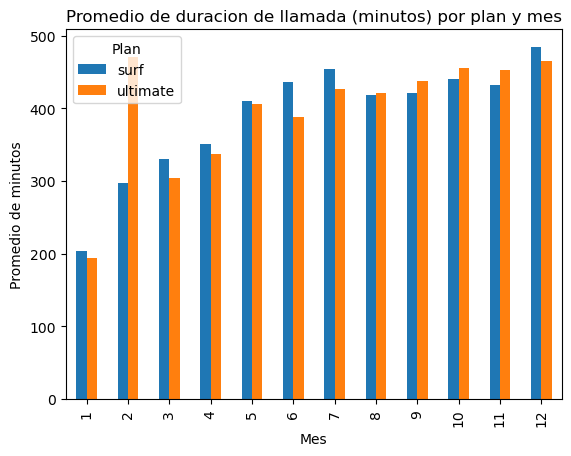

In [32]:
#Grafico sobre la duración promedio de llamadas por cada plan y por cada mes.

avg_minutes_by_plan_month = user_monthly_data.groupby(['plan_name','month'])['total_minutes'].mean().reset_index()


plt.figure(figsize=(18, 12))
avg_minutes_pivot = avg_minutes_by_plan_month.pivot(index='month', columns='plan_name', values='total_minutes')


avg_minutes_pivot.plot(
    title = 'Promedio de duracion de llamada (minutos) por plan y mes',
    kind = 'bar',
    ylabel = 'Promedio de minutos',
    xlabel= 'Mes'
)

plt.legend(title='Plan')
plt.show()


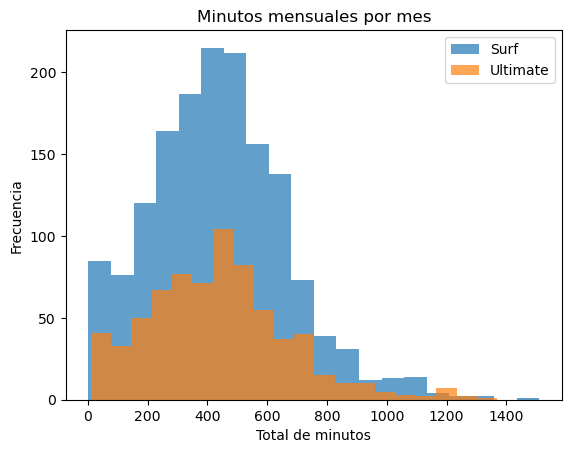

In [33]:
# Histograma comparativo del número de minutos mensuales que necesitan los usuarios de cada plan.
surf_minutes = user_monthly_data[user_monthly_data['plan_name'] == 'surf']['total_minutes']
ultimate_minutes = user_monthly_data[user_monthly_data['plan_name'] == 'ultimate']['total_minutes']

plt.hist(surf_minutes, alpha = 0.7, label ='Surf', bins=20)
plt.hist(ultimate_minutes, alpha=0.7,label ='Ultimate', bins=20)

plt.title('Minutos mensuales por mes')
plt.xlabel('Total de minutos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [34]:
# Calculo de la media y la varianza de la duración mensual de llamadas.
user_monthly_data.groupby(['plan_name','month'])['total_minutes'].agg(['mean', 'var'])

mean           var
plan_name month                          
surf      1      203.000000  15842.000000
          2      297.000000  52226.500000
          3      330.000000  35809.363636
          4      351.540000  50866.743265
          5      410.240000  56938.779459
          6      435.791667  44094.061404
          7      453.733333  59802.012325
          8      417.849057  52122.749224
          9      420.732984  44579.912538
          10     440.891775  48699.905628
          11     432.494585  48748.787108
          12     484.501608  59882.373385
ultimate  1      193.500000  16572.333333
          2      470.333333  54345.066667
          3      304.250000  61984.931818
          4      336.857143  34888.928571
          5      406.241379  43841.046798
          6      387.444444  37902.570707
          7      427.067797  72563.374635
          8      421.436620  53645.506640
          9      437.511628  57070.464569
          10     455.028571  52811.566484
          11     452.320000  58322.606452
          12     465.261745  60461.924270

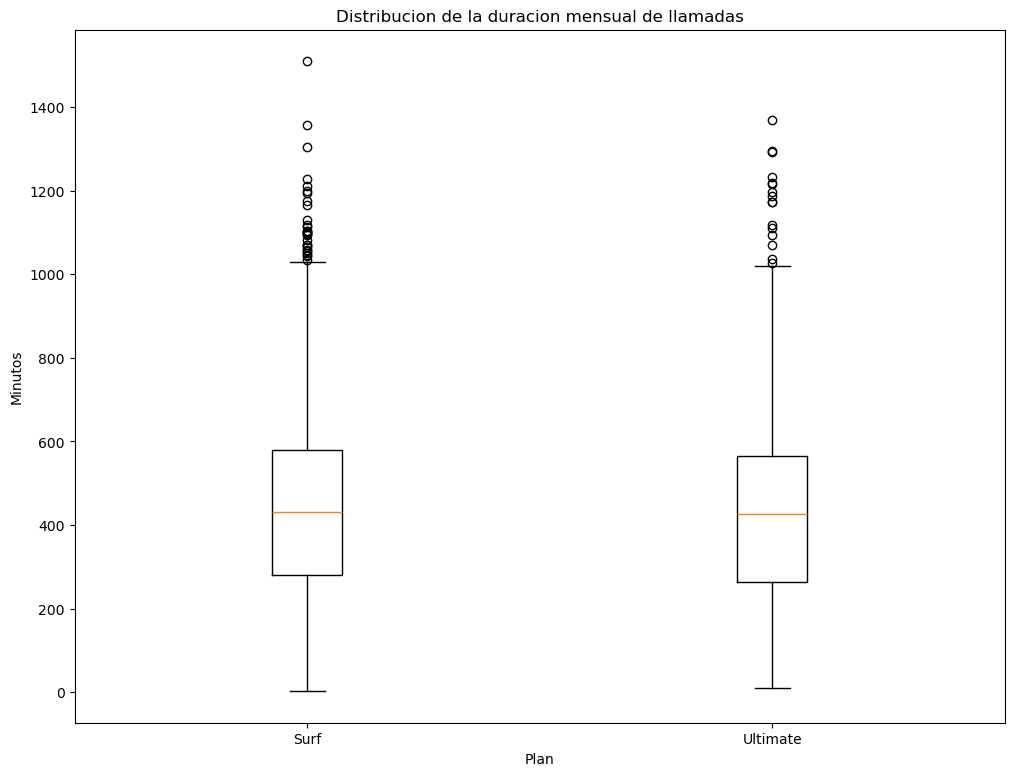

In [35]:
# Trazado de un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12,9))

surf_plan_minutes=user_monthly_data[user_monthly_data['plan_name']== 'surf']['total_minutes']
ultimate_plan_minutes=user_monthly_data[user_monthly_data['plan_name']== 'ultimate']['total_minutes']

surf_plan_minutes_clean = surf_plan_minutes.dropna()
ultimate_plan_minutes_clean = ultimate_plan_minutes.dropna()

plt.boxplot([surf_plan_minutes_clean,ultimate_plan_minutes_clean])
plt.title('Distribucion de la duracion mensual de llamadas')
plt.ylabel('Minutos')
plt.xlabel('Plan')
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.show()

Podemos observar con la media de minutos es que hay una diferencia clara entre el mes 1 y 2 en ambos planes, ademas en ambos planes algo pasa en el me 8 que hay una pequeña baja de minutos y vuelve a seguir la tendencia de subir hasta final del año (mes 12). Esto tomando en cuenta que hay una baja de minutos en el mes 3 del plan ultimate y posteriormente sigue su tendencia a subir. Con respecto a la varianza tambien tiene una tendencia a subir siendo del mes 1 al 2 cuando hay un impacto mucho mayor.
Tambien podemos observar que la media de minutos en ambos planes es mas baja que la cantidad de minutos incluidos en su respectivo plan

<Figure size 1800x1200 with 0 Axes>

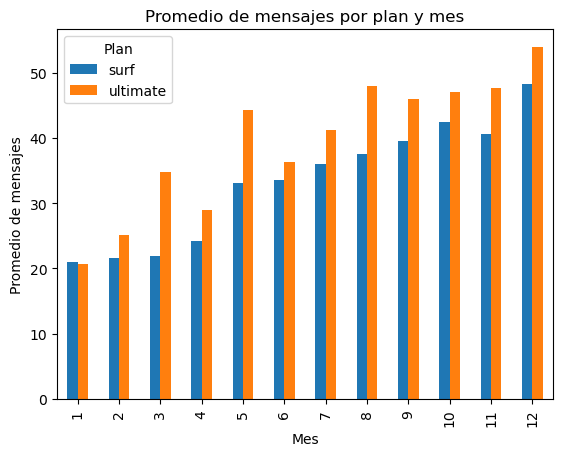

In [36]:
# Compraracion del número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages_monthly = user_monthly_data.groupby(['plan_name','month'])['total_messages'].mean().reset_index()

plt.figure(figsize=(18, 12))
avg_messages_monthly = avg_messages_monthly.pivot(index='month', columns='plan_name', values='total_messages')

avg_messages_monthly.plot(
    title = 'Promedio de mensajes por plan y mes',
    kind = 'bar',
    ylabel = 'Promedio de mensajes',
    xlabel= 'Mes'
)

plt.legend(title='Plan')
plt.show()

In [40]:
user_monthly_data.groupby(['plan_name','month'])['total_messages'].agg(['mean', 'var']).fillna(0)

mean          var
plan_name month                        
surf      1      21.000000     0.000000
          2      21.600000   512.800000
          3      21.937500   352.062500
          4      24.166667   534.028571
          5      33.017857   867.945130
          6      33.616438   936.406393
          7      35.945055   907.985836
          8      37.596774  1013.315762
          9      39.523179   943.051126
          10     42.433862  1234.491613
          11     40.553097  1002.523835
          12     48.326772  1355.129952
ultimate  1      20.666667   310.333333
          2      25.166667   465.366667
          3      34.714286   613.904762
          4      28.937500   512.862500
          5      44.333333  1246.933333
          6      36.289474   807.238265
          7      41.212766   858.084181
          8      47.929825  1034.387845
          9      45.901408   903.375855
          10     46.977528  1099.044944
          11     47.601942  1090.300781
          12     53.936508  1373.803937

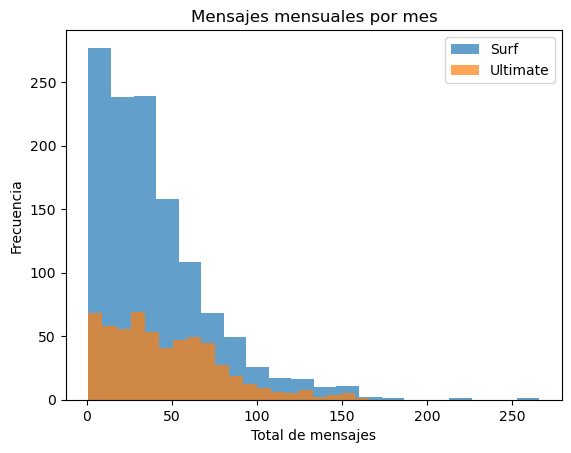

In [38]:
# Histograma comparativo del número de mensajes mensuales que necesitan los usuarios de cada plan.

surf_messages = user_monthly_data[user_monthly_data['plan_name'] == 'surf']['total_messages']
ultimate_messages = user_monthly_data[user_monthly_data['plan_name'] == 'ultimate']['total_messages']

plt.hist(surf_messages, alpha = 0.7, label ='Surf', bins=20)
plt.hist(ultimate_messages, alpha=0.7,label ='Ultimate', bins=20)

plt.title('Mensajes mensuales por mes')
plt.xlabel('Total de mensajes')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

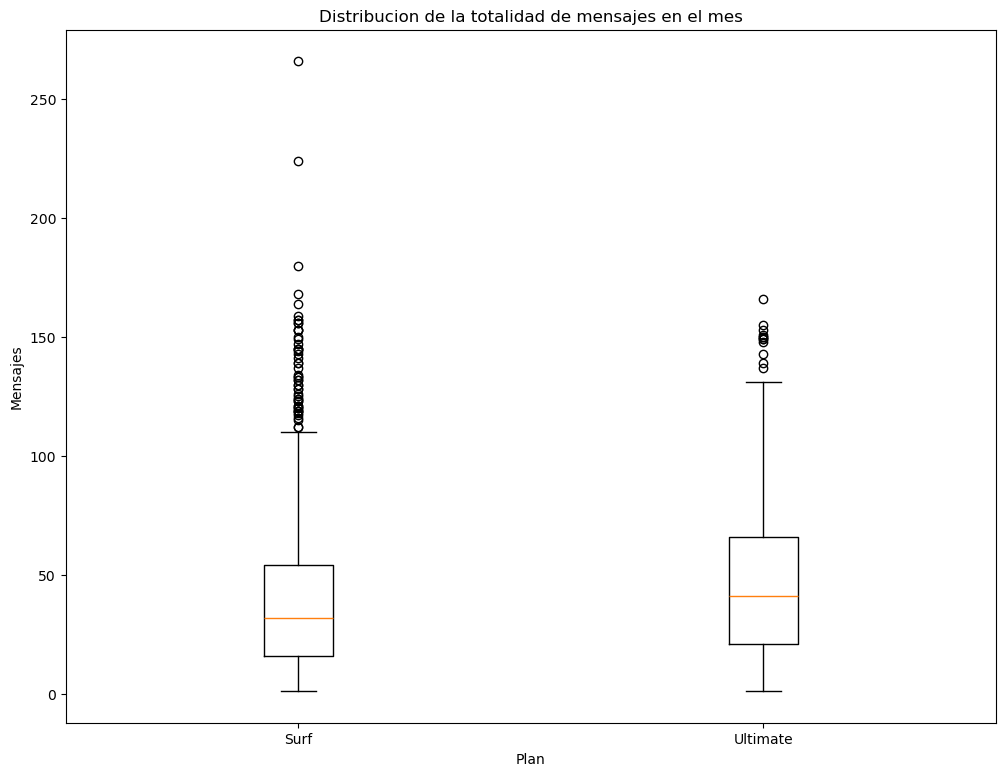

In [41]:
# Trazado de un diagrama de caja para visualizar la distribución de los mensajes mensuales.

plt.figure(figsize=(12,9))

surf_plan_messages=user_monthly_data[user_monthly_data['plan_name']== 'surf']['total_messages']
ultimate_plan_messages=user_monthly_data[user_monthly_data['plan_name']== 'ultimate']['total_messages']

surf_plan_messages_clean = surf_plan_messages.dropna()
ultimate_plan_messages_clean = ultimate_plan_messages.dropna()

plt.boxplot([surf_plan_messages_clean,ultimate_plan_messages_clean])
plt.title('Distribucion de la totalidad de mensajes en el mes')
plt.ylabel('Mensajes')
plt.xlabel('Plan')
plt.xticks([1, 2], ['Surf', 'Ultimate'])

plt.show()


<Figure size 1800x1200 with 0 Axes>

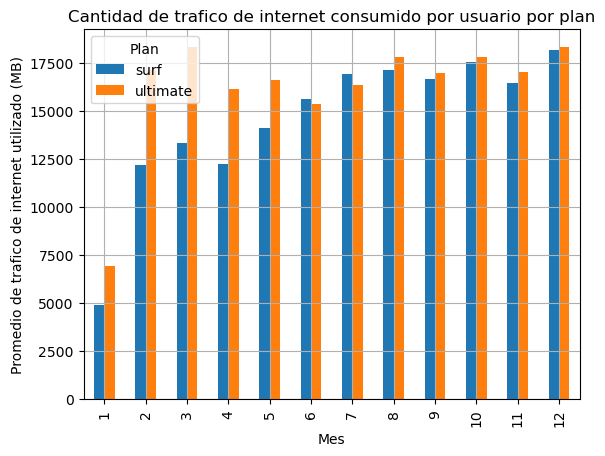

In [42]:
# Comparacion la cantidad de tráfico de Internet consumido por usuarios por plan
avg_gb_monthly = user_monthly_data.groupby(['plan_name','month'])['mb_used'].mean().reset_index()

plt.figure(figsize=(18, 12))
avg_gb_monthly = avg_gb_monthly.pivot(index='month', columns='plan_name', values='mb_used')

avg_gb_monthly.plot(
    title = 'Cantidad de trafico de internet consumido por usuario por plan',
    kind = 'bar',
    ylabel = 'Promedio de trafico de internet utilizado (MB)',
    xlabel= 'Mes'
)
plt.grid(True)
plt.legend(title='Plan')
plt.show()


In [43]:
user_monthly_data.groupby(['plan_name','month'])['mb_used'].agg(['mean', 'var']).fillna(0)

mean           var
plan_name month                            
surf      1       4874.860000  1.823995e+07
          2      12178.843333  4.367296e+07
          3      13345.440000  6.824556e+07
          4      12228.778571  5.722187e+07
          5      14119.728026  5.967252e+07
          6      15623.666632  4.509227e+07
          7      16923.463917  6.284327e+07
          8      17112.224403  7.059657e+07
          9      16677.397254  5.014277e+07
          10     17533.275256  5.942498e+07
          11     16455.548043  5.566336e+07
          12     18189.669590  7.133198e+07
ultimate  1       6918.092500  1.639471e+07
          2      17128.808571  3.764910e+07
          3      18321.518333  1.403392e+08
          4      16121.654762  8.842861e+07
          5      16624.482414  5.679012e+07
          6      15337.921064  7.201453e+07
          7      16344.744407  6.841921e+07
          8      17814.720141  6.044708e+07
          9      16969.869535  4.933904e+07
          10     17780.292000  5.453219e+07
          11     17033.685354  5.758948e+07
          12     18323.191854  6.188130e+07

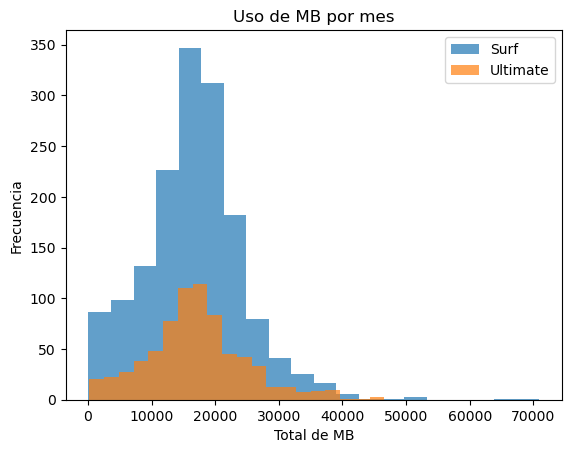

In [44]:
# Histograma comparativo de la cantidad de MB utilizados mensuales que necesitan los usuarios de cada plan.

surf_internet = user_monthly_data[user_monthly_data['plan_name'] == 'surf']['mb_used']
ultimate_internet = user_monthly_data[user_monthly_data['plan_name'] == 'ultimate']['mb_used']

plt.hist(surf_internet, alpha = 0.7, label ='Surf', bins=20)
plt.hist(ultimate_internet, alpha=0.7,label ='Ultimate', bins=20)

plt.title('Uso de MB por mes')
plt.xlabel('Total de MB')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


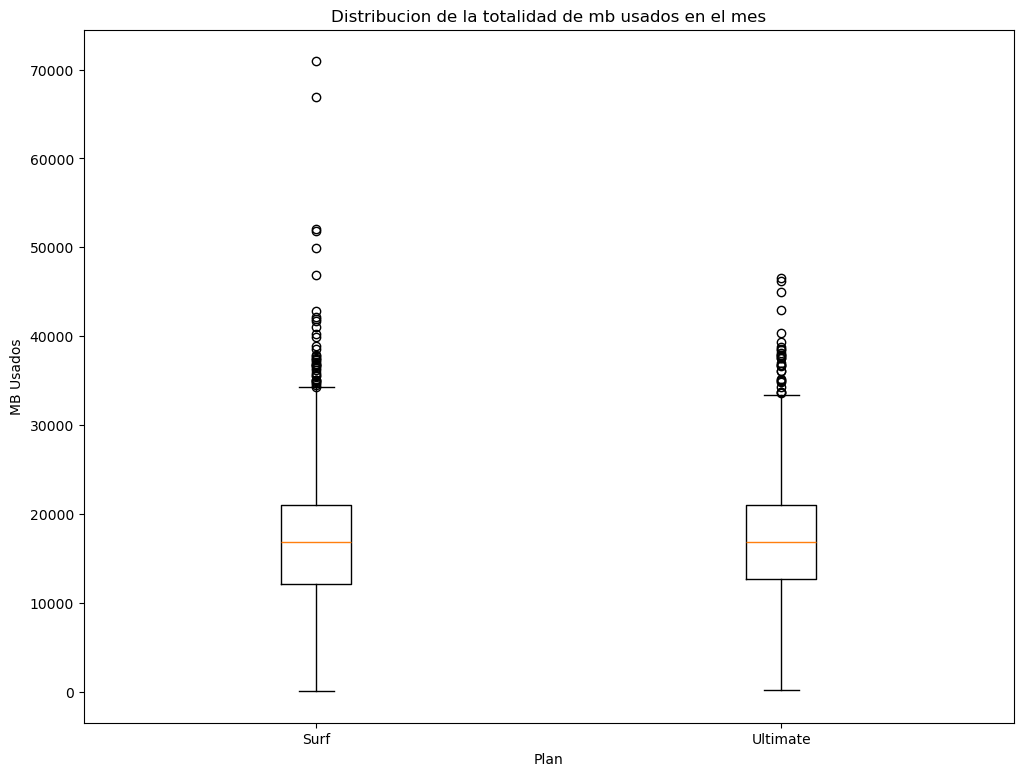

In [45]:
# Trazado de un diagrama de caja para visualizar la distribución de la totalidad de mb usados mensuales.

plt.figure(figsize=(12,9))

surf_plan_internet=user_monthly_data[user_monthly_data['plan_name']== 'surf']['mb_used']
ultimate_plan_internet=user_monthly_data[user_monthly_data['plan_name']== 'ultimate']['mb_used']

surf_plan_internet_clean = surf_plan_internet.dropna()
ultimate_plan_internet_clean = ultimate_plan_internet.dropna()

plt.boxplot([surf_plan_internet_clean,ultimate_plan_internet_clean])
plt.title('Distribucion de la totalidad de mb usados en el mes')
plt.ylabel('MB Usados')
plt.xlabel('Plan')
plt.xticks([1, 2], ['Surf', 'Ultimate'])

plt.show()


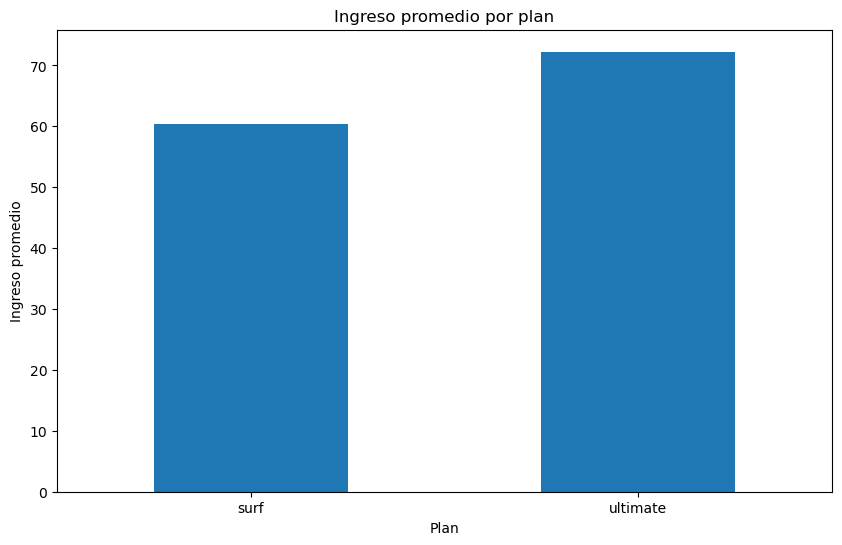

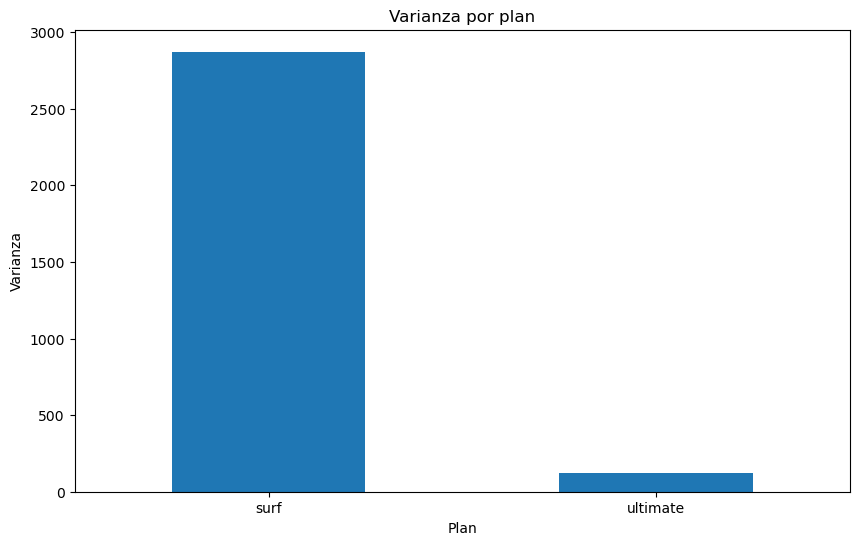

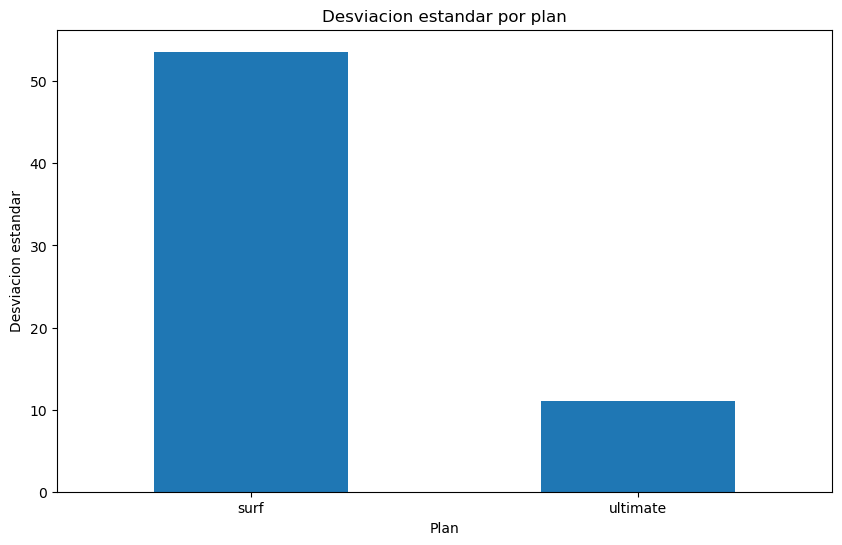

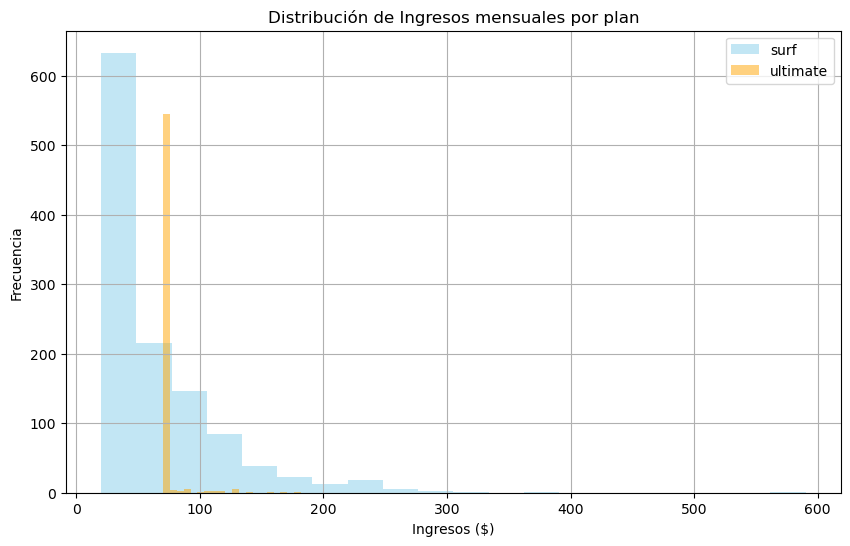

In [46]:
#Estadistica sobre los ingresos mensuales por plan.

total_plan_stats = user_monthly_data.groupby('plan_name')['total_monthly_price'].agg([
    'mean',    
    'median',  
    'std',     
    'var'      
])

total_surf_plan = user_monthly_data[user_monthly_data['plan_name']=='surf']['total_monthly_price']
total_ultimate_plan = user_monthly_data[user_monthly_data['plan_name']=='ultimate']['total_monthly_price']

total_plan_stats['mean'].plot(
    kind = 'bar',
    title = 'Ingreso promedio por plan',
    ylabel = 'Ingreso promedio',
    xlabel = 'Plan',
    figsize = (10,6),
    rot = 0
)
plt.show()



total_plan_stats['var'].plot(
    kind = 'bar',
    title = 'Varianza por plan',
    ylabel = 'Varianza',
    xlabel = 'Plan',
    figsize = (10,6),
    rot = 0
)
plt.show()

total_plan_stats['std'].plot(
    kind = 'bar',
    title = 'Desviacion estandar por plan',
    ylabel = 'Desviacion estandar',
    xlabel = 'Plan',
    figsize = (10,6),
    rot = 0
)
plt.show()


plt.figure(figsize = (10,6))
plt.hist(total_surf_plan, bins=20, label = 'surf', color='skyblue', alpha=0.5)
plt.hist(total_ultimate_plan, bins=20, label = 'ultimate', color='orange', alpha=0.5)
plt.title('Distribución de Ingresos mensuales por plan')
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid()
plt.show()

Vemos claramante que el ingreso promedio por plan es mayor con el plan ultimate por aproximadamente 10 dls mas, sin embargo el precio de dicho plan es de 70 (igualando el promedio). Ahora bien si vemos el promedio de lo que esta gastando los clientes en el plan surf estan practicamente triplicando (en promedio) su pago mensual de 20 a 60 dls por mes.Podemos ver que hay una gran variabilidad con el plan surf, donde el promedio de usuarios esta gastando mas del costo del plan. Se podria checar una estrategia para generar un plan a la medida de estos clientes que gastan mas pero sin llegar al plan ultimate.

In [47]:
# Prueba las hipótesis
# Ho : No hay diferencia entre los ingresos mensuales del plan ultimate con respecto al plan surf
# Hi : Hay diferencia entre los ingresos mensuales del plan ultimate con respecto al plan surf
#Si p > 0.05 → NO rechazamos la hipótesis nula (H₀)
#Si p ≤ 0.05 → Rechazamos la hipótesis nula (H₀)

alpha = 0.05

total_surf_plan_clean = total_surf_plan.dropna()
total_ultimate_plan_clean = total_ultimate_plan.dropna()
hyp_results = st.ttest_ind(total_ultimate_plan_clean,total_surf_plan_clean)

print( "Valor Aplha: ", alpha, ", Se acepta un 5% de probabilidad de error","\n"
       "Valor p:",hyp_results.pvalue
    )

if hyp_results.pvalue < alpha:
    print ("Valor P menor a 5%, Rechazamos Hipotesis Nula (Ho)")
else:
    print("No se recahaza Hipotesis Nula, Se acepta Hipotesis Alternativa (Hi)")

Valor Aplha:  0.05 , Se acepta un 5% de probabilidad de error 
Valor p: 1.6646672537477615e-07
Valor P menor a 5%, Rechazamos Hipotesis Nula (Ho)


In [48]:
# Prueba las hipótesis
#Ho : Ingreso promedio del Area NY - NJ es igual a los usuarios de otras regiones.
#Hi : Ingreso promedio del Area NY - NJ es diferente a los usuarios de otras regiones.
#Si p > 0.05 → NO rechazamos la hipótesis nula (H₀)
#Si p ≤ 0.05 → Rechazamos la hipótesis nula (H₀)
df_city_nynj = df_megaline_users[df_megaline_users['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']

user_monthly_data_nynj = pd.merge(
    user_monthly_data,
    df_city_nynj[['user_id','city']],
    on = 'user_id', 
    how='right'
)
user_monthly_data_nynj_clean = user_monthly_data_nynj.dropna().reset_index()
user_monthly_data_clean = user_monthly_data.dropna().reset_index()
nynj_revenue = user_monthly_data_nynj_clean['total_monthly_price']
other_cities_revenue = user_monthly_data_clean[~user_monthly_data_clean['user_id'].isin(df_city_nynj['user_id'])]['total_monthly_price']

alpha = 0.05
hyp_results = st.ttest_ind(nynj_revenue,other_cities_revenue)

#print(f"Ingreso promedio NY-NJ: ${nynj_revenue.mean():.2f}")
#print(f"Ingreso promedio otras regiones: ${other_cities_revenue.mean():.2f}")

print( "Valor Aplha: ", alpha, ", Se acepta un 5% de probabilidad de error","\n"
       "Valor p:",hyp_results.pvalue
    )
if hyp_results.pvalue < alpha:
    print ("Valor P menor a 5%, Rechazamos Hipotesis Nula (Ho)")
else:
    print("No se recahaza Hipotesis Nula, Se acepta Hipotesis Alternativa (Hi)")

Valor Aplha:  0.05 , Se acepta un 5% de probabilidad de error 
Valor p: 0.010053583550147672
Valor P menor a 5%, Rechazamos Hipotesis Nula (Ho)
